# Diffusion

This notebook illustrates the ranking of the nodes of a graph by [diffusion](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#diffusion).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Ranking**

In [4]:
diffusion = skn.ranking.Diffusion()

In [5]:
diffusion.fit(adjacency, {1: 0, 2: 1})

Diffusion()

In [6]:
score = diffusion.score_

**Visualization**

In [7]:
from networkx import from_scipy_sparse_matrix, spring_layout, draw

In [8]:
graph = from_scipy_sparse_matrix(adjacency)

In [9]:
pos = spring_layout(graph)

In [10]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color = score, cmap = 'coolwarm')

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


**Parameters**

In [11]:
# Personalization as vector (only non-zeros entries are taken into account)
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[1] = -1
personalization[2] = 1
diffusion.fit(adjacency, personalization)
score = diffusion.score_

## Directed graphs

**Loading**

In [12]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Ranking**

In [13]:
picasso = 0
monet = 1

In [14]:
diffusion.fit(adjacency, {picasso: -1, monet: 1})

Diffusion()

In [15]:
score = diffusion.score_

**Visualization**

In [16]:
from networkx import DiGraph, from_scipy_sparse_matrix, spring_layout, draw

In [17]:
graph = from_scipy_sparse_matrix(adjacency, create_using=DiGraph())

In [18]:
pos = spring_layout(graph)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


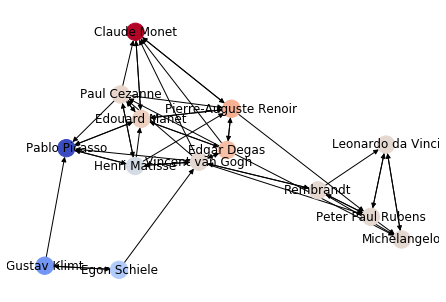

In [19]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color = score, cmap = 'coolwarm', labels = names)

## Bipartite graphs

**Loading**

In [20]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Ranking**

In [21]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [22]:
drive = 3
aviator = 9

In [23]:
diffusion.fit(adjacency, personalization = {drive: -1, aviator: 1})

Diffusion()

In [24]:
score = diffusion.score_

**Visualization**

In [25]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [26]:
graph = from_scipy_sparse_matrix(adjacency)

In [27]:
n1,n2 = biadjacency.shape
pos = {i: (0,i) for i in range(n1)}
pos.update({n1 + i: (2,i) for i in range(n2)})

In [28]:
pos_labels = {i: (0.5,i) for i in range(n1)}
pos_labels.update({n1 + i: (1.5,i) for i in range(n2)})

In [29]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

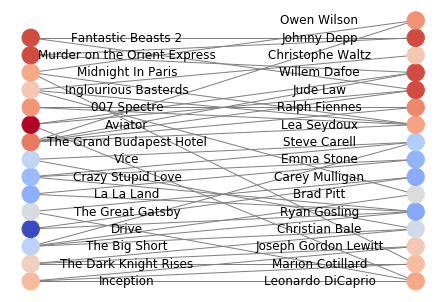

In [30]:
# Warning: If the image does not appear, run the cell again.
draw(graph, 
     pos = pos, 
     edge_color = 'grey',
     node_color = score, 
     cmap = 'coolwarm')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)